In [ ]:
from IPython.display import display, Image

In [ ]:
### 한글 폰트 설정
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform

path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
matplotlib.rcParams['axes.unicode_minus'] = False

%matplotlib inline

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
print(np.__version__)
print(matplotlib.__version__)


1.20.1
3.3.4


In [ ]:
# 설치가 안되어 있을 경우, 설치 필요.
import mglearn
import sklearn
print( sklearn.__version__)
print( mglearn.__version__)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

0.24.1
0.1.9


w[0]: 0.393906  b: -0.031804


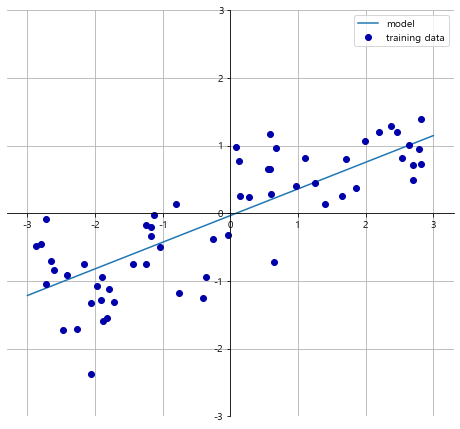

In [ ]:
mglearn.plots.plot_linear_regression_wave()

In [ ]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

In [ ]:
boston = load_boston()
X = boston.data
y = boston.target 

In [ ]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <BarContainer object of 10 artists>)

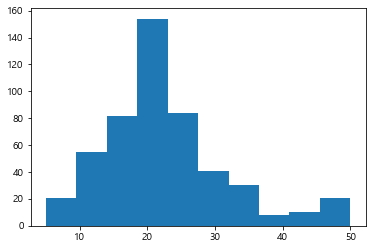

In [ ]:
plt.hist(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
##  model = 모델명()
##  model.fit(입력, 답)  # 답 - 레이블
##  pred = model.predict(새로운 데이터 입력)
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
pred[0:10]

array([28.83885359, 36.00783288, 15.08324755, 25.23090886, 18.87864064,
       23.21398327, 17.5931124 , 14.30508093, 23.05438985, 20.62008346])

In [ ]:
import pandas as pd

In [ ]:
dict_dat = {"실제값":y_test, "예측값":pred, "오차":y_test-pred}
dat = pd.DataFrame(dict_dat)
dat.head()

,실제값,예측값,오차
0,23.6,28.838854,-5.238854
1,32.4,36.007833,-3.607833
2,13.6,15.083248,-1.483248
3,22.8,25.230909,-2.430909
4,16.1,18.878641,-2.778641


In [ ]:
dat.shape[0]

127

In [ ]:
dat['오차제곱'] = dat['오차'] * dat['오차']
mse_val = dat['오차제곱'].sum() / dat.shape[0]
mse_val

22.098694827098036

In [ ]:
mae_val = np.abs( dat['오차'] ).sum()/dat.shape[0]
mae_val

3.060939595437034

In [ ]:
# rmse
rmse_val = mse_val ** 0.5
rmse_val

4.700924890603766

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pred)

22.098694827098036

In [ ]:
## MSE :  (실제값 - 예측값)^2-전체합 / 데이터개수
## RMSE :  MSE에 루트 씌운 것
## MAE :  |실제값 - 예측값| 전체합 / 데이터 개수
## RMLSE : RMSE에 실제값과 예측값을 log처리해 준것. 
## ( log(실제값+1) - log(예측값+1) )

In [ ]:
print("학습용 데이터 결정 계수 : {:.2f}".format(model.score(X_train, y_train)))
print("테스트 데이터 결정 계수 : {:.2f}".format(model.score(X_test, y_test)))


학습용 데이터에 대한 결정 계수 : 0.75
테스트 데이터에 대한 결정 계수 : 0.68


In [ ]:
## 75% - 25% 
## 70% - 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size=0.1,
                                                   random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
tr_score = model.score(X_train,y_train)
test_score = model.score(X_test, y_test)
print("학습용 :{}, 테스트용 :{}".format(tr_score, test_score))

학습용 :0.7375152736886281, 테스트용 :0.7598135533532498


In [ ]:
## 9-1, 8-2, 7-3, 6-4, 5-5 
for i in range(1, 6, 1):
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=(i/10),
                                                    random_state=42)
    model = LinearRegression().fit(X_train, y_train)

    tr_score = model.score(X_train,y_train)
    test_score = model.score(X_test, y_test)
    print(f"학습용 :{10-i}, 테스트용 :{i}")
    print("학습용 :{}, 테스트용 :{}".format(tr_score, test_score))
    
    pred = model.predict(X_test)
    mse_val = np.sum( (y_test - pred)**2 ) / len(pred)
    print("mse value :{}".format(mse_val))
    rmse_val = mse_val ** 0.5
    print("rmse value :{}".format(rmse_val))

학습용 :9, 테스트용 :1
학습용 :0.7375152736886281, 테스트용 :0.7598135533532498
mse value :14.995852876582495
rmse value :3.872447917865713
학습용 :8, 테스트용 :2
학습용 :0.7508856358979673, 테스트용 :0.6687594935356329
mse value :24.291119474973456
rmse value :4.928602182665331
학습용 :7, 테스트용 :3
학습용 :0.7434997532004697, 테스트용 :0.711226005748496
mse value :21.517444231176995
rmse value :4.638689926172797
학습용 :6, 테스트용 :4
학습용 :0.747199884740759, 테스트용 :0.7125140936111221
mse value :21.832709989577456
rmse value :4.6725485540096265
학습용 :5, 테스트용 :5
학습용 :0.7719887864238001, 테스트용 :0.6896917482875748
mse value :25.175390536117014
rmse value :5.017508399207421


In [ ]:
import mglearn

In [ ]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import Lasso, Ridge
import pandas as pd

In [ ]:
### 한글 폰트 설정
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform

path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
matplotlib.rcParams['axes.unicode_minus'] = False

%matplotlib inline

In [ ]:
boston = load_boston()
print(type(boston.data), type(boston.target))

df_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
df_boston['price'] = pd.Series(boston.target)
df_boston.head()

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [ ]:
df_boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'price'],
      dtype='object')

In [ ]:
# 입력과 출력 - X, y
X = df_boston.loc[ :, 'CRIM':'LSTAT']
y = df_boston['price']

print(X.shape, y.shape)
print(df_boston['CRIM'].min(), df_boston['CRIM'].max())
print(df_boston['NOX'].min(), df_boston['NOX'].max())
print(df_boston['INDUS'].min(), df_boston['INDUS'].max())

(506, 13) (506,)
0.00632 88.9762
0.385 0.871
0.46 27.74


In [ ]:
### 데이터 정규화 - 데이터의 값의 범위 0~... -> 0~1
nor_X = MinMaxScaler().fit_transform(X)

print(type(nor_X))
print( np.min(nor_X[0]), np.max(nor_X[0]))
print( np.min(nor_X[1]), np.max(nor_X[1]))

<class 'numpy.ndarray'>
0.0 0.9999999999999999
0.0 0.9999999999999999


In [ ]:
print(X.shape, y.shape)

ex_X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(nor_X)

print(ex_X.shape, y.shape)

(506, 13) (506,)
(506, 104) (506,)


In [ ]:
# a b c => a b c a**2 b**2 c**2 a*b a*c c*a ...

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
model = LinearRegression().fit(X_train, y_train)
print(model.score(X_train, y_train), model.score(X_test, y_test))

0.7480872598623441 0.6844267283527123


In [ ]:
### feature를 많이 만든다음 계산한 것.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(ex_X, y, random_state=42)

In [ ]:
ex_model = LinearRegression().fit(X_train, y_train)
print(ex_model.score(X_train, y_train), ex_model.score(X_test, y_test))

0.9448313975211594 0.7758378393351691


In [ ]:
from sklearn.linear_model import Lasso, Ridge

In [ ]:
## 라소회귀
lasso_m = Lasso(alpha=0.01).fit(X_train, y_train)
print(lasso_m.score(X_train, y_train), lasso_m.score(X_test, y_test))

0.8865033777946089 0.80359225764207


C:\Users\toto\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.848133364149362, tolerance: 3.361037625329815
  model = cd_fast.enet_coordinate_descent(


In [ ]:
## 리지회귀
ridge_m = Ridge(alpha=0.01).fit(X_train, y_train)
print(ridge_m.score(X_train, y_train), ridge_m.score(X_test, y_test))

0.9357645261988872 0.8144760713008208


### 라소회귀(L1) - w값을 0으로 만드는 것이 생긴다.

In [ ]:
lasso = Lasso(alpha=1).fit(X_train, y_train)
print("학습용 데이터 세트 점수 : {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 데이터 세트 점수 : {:.2f}".format(lasso.score(X_test, y_test)))

학습용 데이터 세트 점수 : 0.27
테스트 데이터 세트 점수 : 0.26


In [ ]:
lasso00001 = Lasso(alpha=0.0001).fit(X_train, y_train)
print("학습용 데이터 점수 : {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 데이터 점수 : {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 수 : ", np.sum(lasso00001.coef_ != 0))

학습용 데이터 점수 : 0.94
테스트 데이터 점수 : 0.78
사용한 특성의 수 :  102


C:\Users\toto\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1061.5581359471444, tolerance: 3.361037625329815
  model = cd_fast.enet_coordinate_descent(


In [ ]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("학습용 데이터 세트 점수 : ",lasso001.score(X_train, y_train))
print("테스트 데이터 세트 점수 : ",lasso001.score(X_test, y_test))
print("사용한 특성의 수 : ", np.sum(lasso001.coef_ != 0))

학습용 데이터 세트 점수 :  0.8864717420585476
테스트 데이터 세트 점수 :  0.8036004116583615
사용한 특성의 수 :  34


In [ ]:
lasso01 = Lasso(alpha=0.1, max_iter=100000).fit(X_train, y_train)
print("학습용 데이터 세트 점수 : ",lasso01.score(X_train, y_train))
print("테스트 데이터 세트 점수 : ",lasso01.score(X_test, y_test))
print("사용한 특성의 수 : ", np.sum(lasso01.coef_ != 0))

학습용 데이터 세트 점수 :  0.7471467575228325
테스트 데이터 세트 점수 :  0.6986891802234085
사용한 특성의 수 :  12


In [ ]:
lasso10 = Lasso(alpha=10, max_iter=100000).fit(X_train, y_train)
print("학습용 데이터 세트 점수 : ",lasso10.score(X_train, y_train))
print("테스트 데이터 세트 점수 : ",lasso10.score(X_test, y_test))
print("사용한 특성의 수 : ", np.sum(lasso10.coef_ != 0))

학습용 데이터 세트 점수 :  0.0
테스트 데이터 세트 점수 :  -0.03189647654769301
사용한 특성의 수 :  0


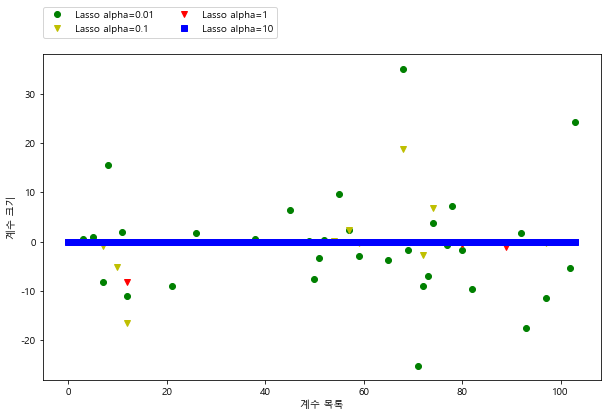

In [ ]:
lasso = Lasso(alpha=1).fit(X_train, y_train)

plt.figure(figsize=(10,6))
# plt.plot(lasso00001.coef_, "r^", label="Lasso alpha=0.0001")
plt.plot(lasso001.coef_, 'go', label="Lasso alpha=0.01")
plt.plot(lasso01.coef_, 'yv', label="Lasso alpha=0.1")
plt.plot(lasso.coef_, 'rv', label="Lasso alpha=1")
plt.plot(lasso10.coef_, "bs", label="Lasso alpha=10")

plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
# plt.ylim(-25, 25)
plt.legend(ncol=2, loc=(0,1.05))
plt.show()

### 릿지 회귀(L2) - w값을 0으로 가깝게 하지만, 0으로 하는 것은 없다.

In [ ]:
ridge00001 = Ridge(alpha=0.0001).fit(X_train, y_train)
print("학습용 데이터 점수 : {:.2f}".format(ridge00001.score(X_train, y_train)))
print("테스트 데이터 점수 : {:.2f}".format(ridge00001.score(X_test, y_test)))
print("사용한 특성의 수 : ", np.sum(ridge00001.coef_ != 0))

학습용 데이터 점수 : 0.94
테스트 데이터 점수 : 0.79
사용한 특성의 수 :  104


In [ ]:
ridge0001 = Ridge(alpha=0.001).fit(X_train, y_train)
print("학습용 데이터 점수 : {:.2f}".format(ridge0001.score(X_train, y_train)))
print("테스트 데이터 점수 : {:.2f}".format(ridge0001.score(X_test, y_test)))
print("사용한 특성의 수 : ", np.sum(ridge0001.coef_ != 0))

학습용 데이터 점수 : 0.94
테스트 데이터 점수 : 0.81
사용한 특성의 수 :  104


In [ ]:
ridge001 = Ridge(alpha=0.01).fit(X_train, y_train)
print("학습용 데이터 점수 : {:.2f}".format(ridge001.score(X_train, y_train)))
print("테스트 데이터 점수 : {:.2f}".format(ridge001.score(X_test, y_test)))
print("사용한 특성의 수 : ", np.sum(ridge001.coef_ != 0))

학습용 데이터 점수 : 0.94
테스트 데이터 점수 : 0.81
사용한 특성의 수 :  104


In [ ]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("학습용 데이터 점수 : {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 데이터 점수 : {:.2f}".format(ridge01.score(X_test, y_test)))
print("사용한 특성의 수 : ", np.sum(ridge01.coef_ != 0))

학습용 데이터 점수 : 0.92
테스트 데이터 점수 : 0.82
사용한 특성의 수 :  104


In [ ]:
ridge1 = Ridge(alpha=1).fit(X_train, y_train)
print("학습용 데이터 점수 : {:.2f}".format(ridge1.score(X_train, y_train)))
print("테스트 데이터 점수 : {:.2f}".format(ridge1.score(X_test, y_test)))
print("사용한 특성의 수 : ", np.sum(ridge1.coef_ != 0))

학습용 데이터 점수 : 0.87
테스트 데이터 점수 : 0.81
사용한 특성의 수 :  104


In [ ]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("학습용 데이터 점수 : {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 데이터 점수 : {:.2f}".format(ridge10.score(X_test, y_test)))
print("사용한 특성의 수 : ", np.sum(ridge10.coef_ != 0))

학습용 데이터 점수 : 0.77
테스트 데이터 점수 : 0.73
사용한 특성의 수 :  104


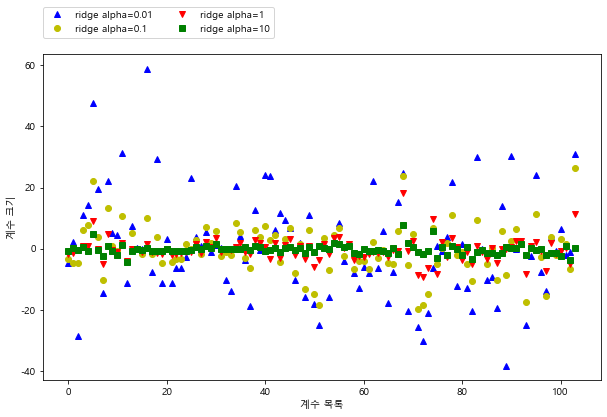

In [ ]:
plt.figure(figsize=(10,6))
#plt.plot(ridge00001.coef_, "r^", label="ridge alpha=0.0001")
#plt.plot(ridge0001.coef_, "g^", label="ridge alpha=0.001")
plt.plot(ridge001.coef_, "b^", label="ridge alpha=0.01")
plt.plot(ridge01.coef_, 'yo', label="ridge alpha=0.1")
plt.plot(ridge1.coef_, 'rv', label="ridge alpha=1")
plt.plot(ridge10.coef_, "gs", label="ridge alpha=10")

plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
# plt.ylim(-25, 25)
plt.legend(ncol=2, loc=(0,1.05))
plt.show()